# List 2 
Class 5 - Linear Regression Models

- ** Linear Regression Model and Avore Decision Regression **
 
** Exercise 1 ** 

The census.csv file contains the data set extracted from the 2000 IBGE census, presents for each unit of the federation the average number
of years of study and the average monthly income (in reais) of the chief or heads of the home. Make a linear regression model that explains the income by the average number of years of study.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sbn
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
df = pd.read_csv("data/censo.csv", sep=";")
df.head()

,UF,Escolar,Renda
0,RR,5.7,685
1,AP,6.0,683
2,AC,4.5,526
3,RO,4.9,662
4,PA,4.7,536


In [3]:
df.tail()

,UF,Escolar,Renda
22,PR,6.0,782
23,MT,5.4,775
24,GO,5.5,689
25,MS,5.7,731
26,DF,8.2,1499


In [4]:
df.shape

(27, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UF       27 non-null     object 
 1   Escolar  27 non-null     float64
 2   Renda    27 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 780.0+ bytes


In [6]:
df.dtypes

UF          object
Escolar    float64
Renda        int64
dtype: object

# Part 2 - Data Analysis

<Axes: xlabel='Renda', ylabel='UF'>

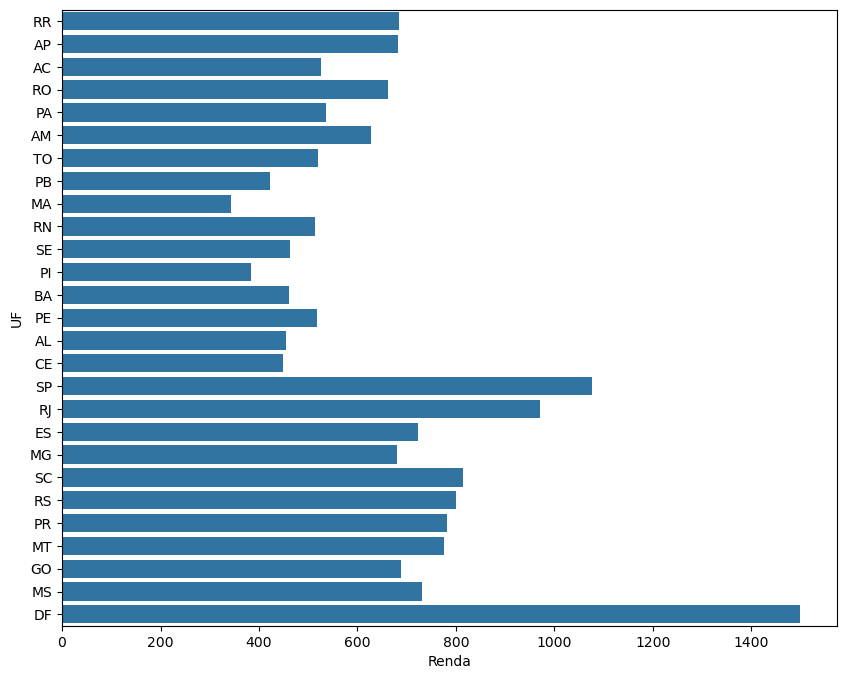

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Renda", y="UF", data=df) 

<Axes: xlabel='Renda', ylabel='Escolar'>

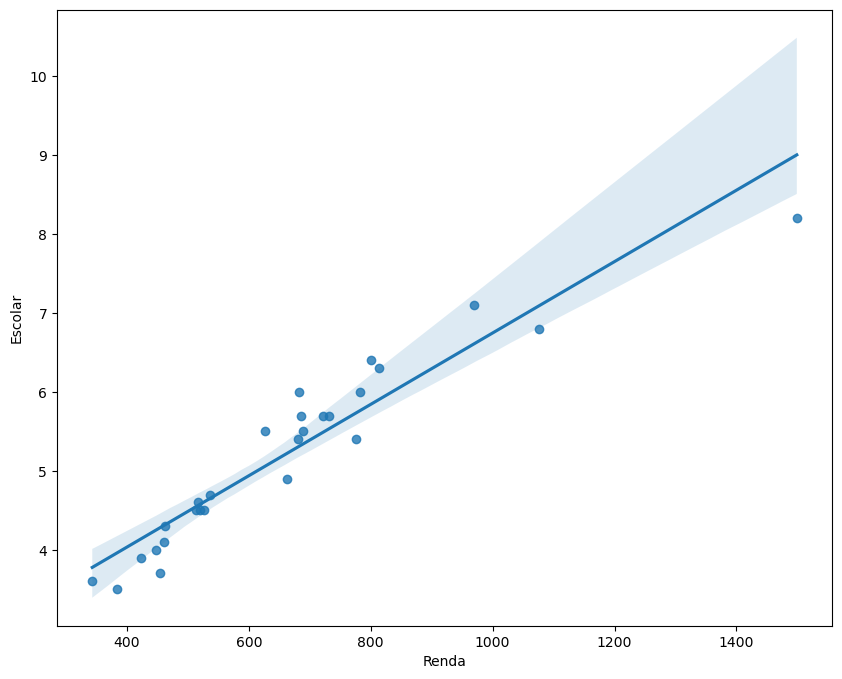

In [11]:
plt.figure(figsize=(10, 8))
sns.regplot(x="Renda", y="Escolar", data=df) 

<Axes: xlabel='Escolar', ylabel='Renda'>

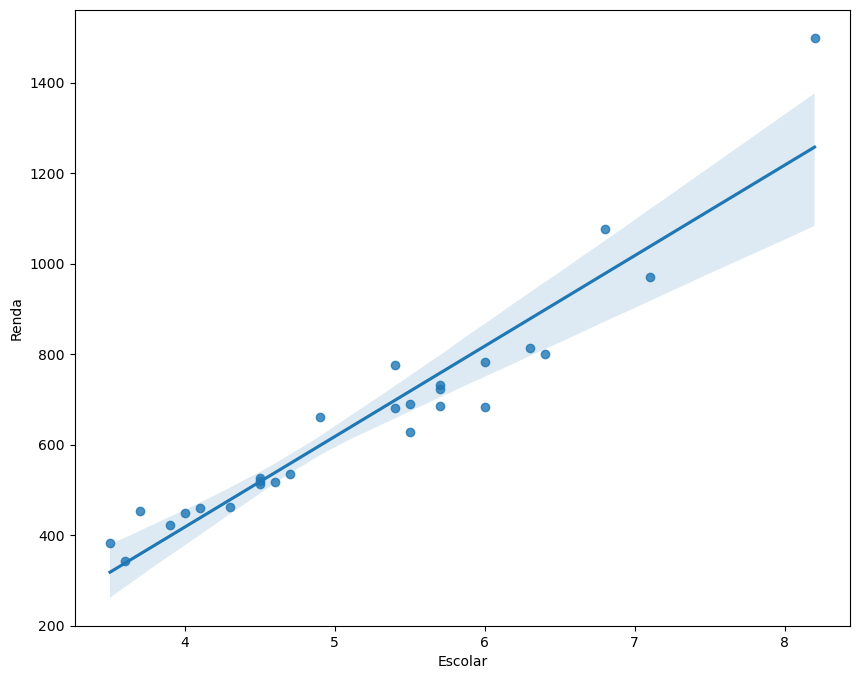

In [12]:
plt.figure(figsize=(10, 8))
sns.regplot(x="Escolar", y="Renda", data=df) 

# Part 3 - Check out outler

<Axes: ylabel='Escolar'>

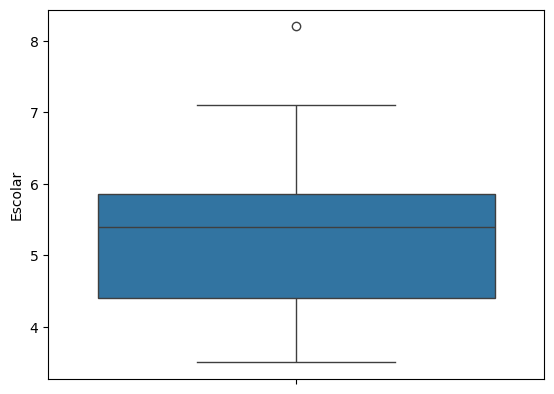

In [13]:
sns.boxplot(df["Escolar"])

<Axes: ylabel='Renda'>

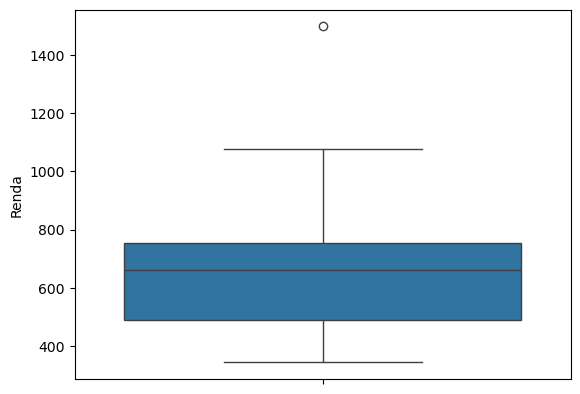

In [14]:
sns.boxplot(df["Renda"])

# Part 4 - Training and Test Division

In [15]:
x = df[["Escolar"]]
y = df["Renda"]

In [16]:
x.shape

(27, 1)

In [17]:
y.shape

(27,)

# Part 5 - Model Training

In [18]:
from sklearn.model_selection import train_test_split

# Division in training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Viewing training
print("Linhas e colunas X_train", X_train.shape)
print("Linhas e colunas y_train", y_train.shape)

Linhas e colunas X_train (21, 1)
Linhas e colunas y_train (21,)


# Part 6 - Model Machine Learning Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
model = LinearRegression()

# Model Training
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Model score model
model_score = model.score(X_train, y_train)
print("Score modelo regressão linear:", model_score)

Score modelo regressão linear: 0.9018261494603836


In [22]:
# Model forecast
y_pred = model.predict(X_test)

In [23]:
# Model Coefficients
print(f'Coeficiente (b1): {model.coef_[0]}')
print(f'Intercepto (b0): {model.intercept_}')

Coeficiente (b1): 208.7217884265697
Intercepto (b0): -422.78974578386294


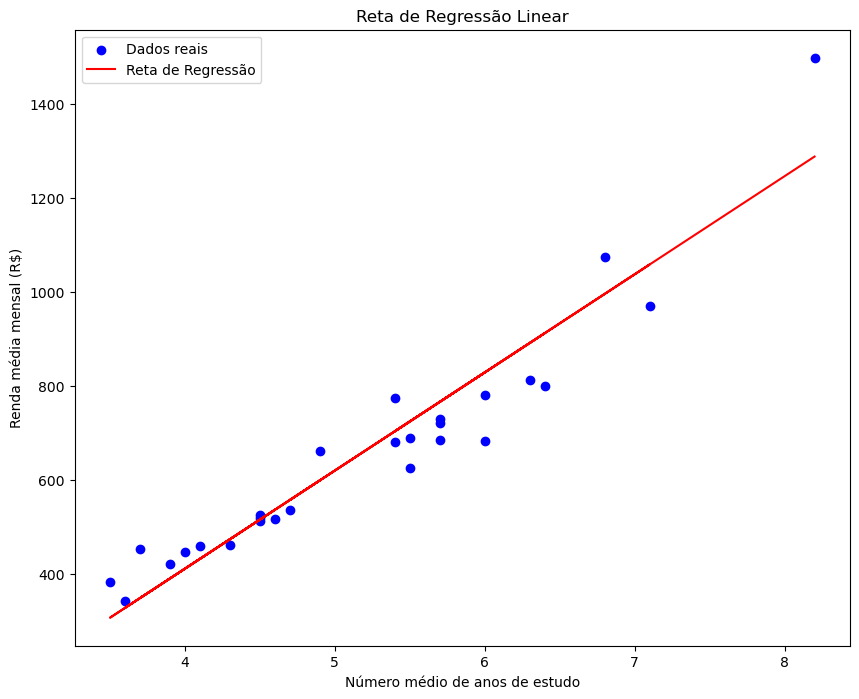

In [25]:
# Chart Model Forecast
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Dados reais')
plt.plot(x, model.predict(x), color='red', label='Reta de Regressão')
plt.xlabel('Número médio de anos de estudo')
plt.ylabel('Renda média mensal (R$)')
plt.title('Reta de Regressão Linear')
plt.legend()
plt.show()

In [26]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 4297.38645750086
R-squared (R²): 0.8318496242357374


## ** Exercise 2 **

In the fuel.csv file, the acronyms of the 48 US states are presented with the following
Variables: Rate (fuel rate in USD state), license (proportion of licensed drivers), income
(per capita income in USD), roads (federal aid for roads in a thousand USD) and consumption (consumption of
fuel per inhabitant). The interest in this study is to try to explain the average fuel consumption by
Variables Rate, License, Income and Roads.

In [27]:
data5 = pd.read_csv("data/combustivel(1).csv", sep=";")
data5.head()

,UF,taxa,licenca,renda,estradas,consumo
0,ME,9.0,0.525,3571,1976,541
1,NH,9.0,0.572,4092,1250,524
2,VT,9.0,0.580,3865,1586,561
3,MA,7.5,0.529,4870,2351,414
4,RI,8.0,0.544,4399,431,410


In [28]:
data5.tail()

,UF,taxa,licenca,renda,estradas,consumo
43,UT,7.0,0.508,3745,2611,591
44,NV,6.0,0.672,5215,2302,782
45,WA,9.0,0.571,4476,3942,510
46,OR,7.0,0.623,4296,4083,610
47,CA,7.0,0.593,5002,9794,524


In [29]:
data5.shape

(48, 6)

In [30]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UF        48 non-null     object 
 1   taxa      48 non-null     float64
 2   licenca   48 non-null     float64
 3   renda     48 non-null     int64  
 4   estradas  48 non-null     int64  
 5   consumo   48 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.4+ KB


In [31]:
data5.dtypes

UF           object
taxa        float64
licenca     float64
renda         int64
estradas      int64
consumo       int64
dtype: object

# Data Analysis

In [32]:
data5.describe().T

,count,mean,std,min,25%,50%,75%,max
taxa,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
licenca,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
renda,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
estradas,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
consumo,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


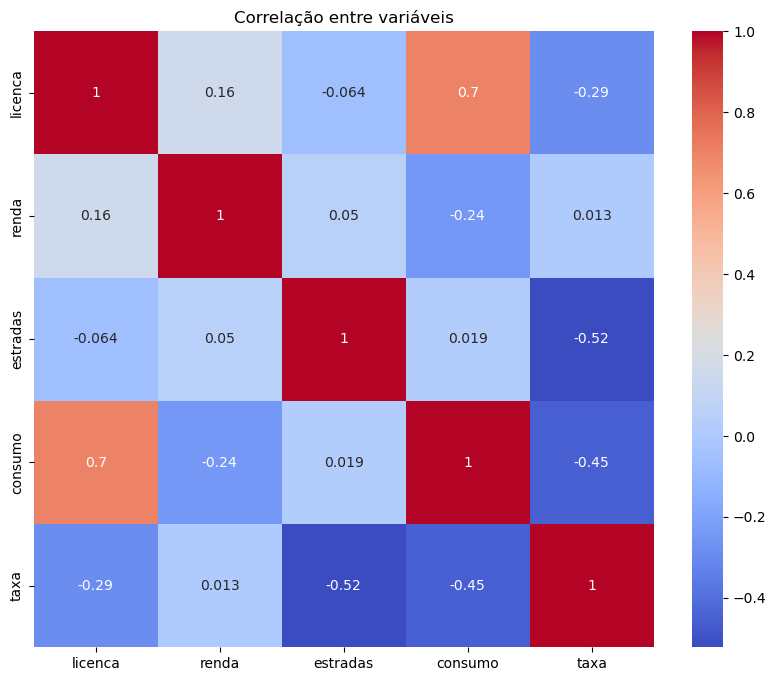

In [33]:
# Correlation between variables
correlation = data5[["licenca", "renda", "estradas","consumo", 'taxa']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()

<Axes: xlabel='renda', ylabel='consumo'>

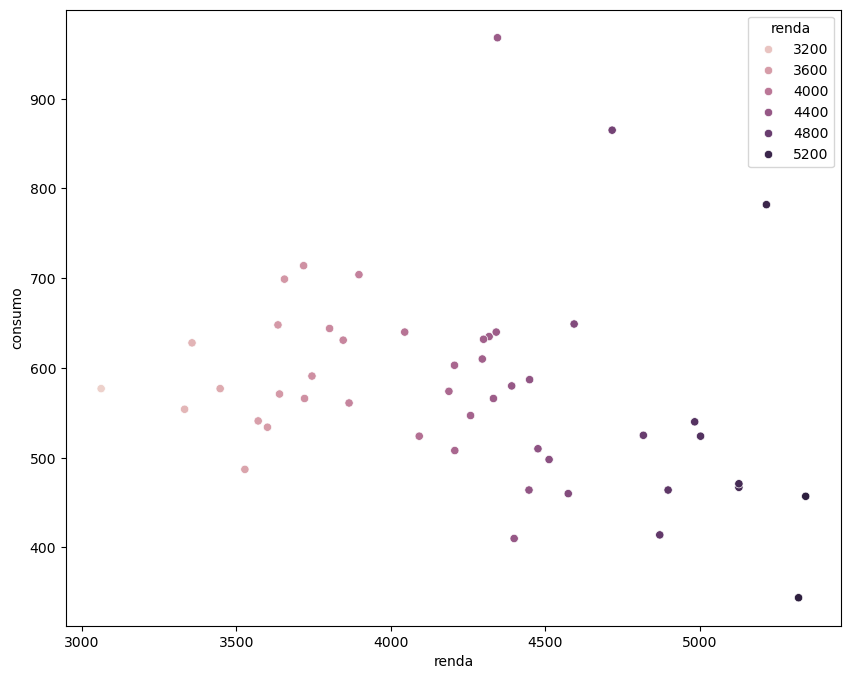

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="renda", y="consumo", hue="renda", data=data5)

<Axes: xlabel='renda', ylabel='UF'>

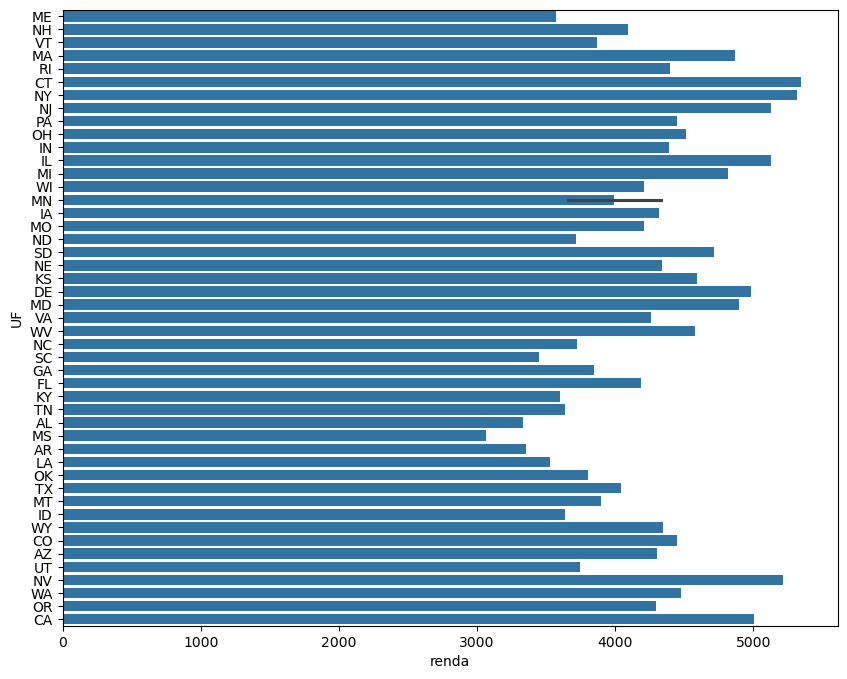

In [36]:
plt.figure(figsize=(10, 8)) 
sns.barplot(x="renda", y="UF", data=data5)

<Axes: xlabel='consumo', ylabel='UF'>

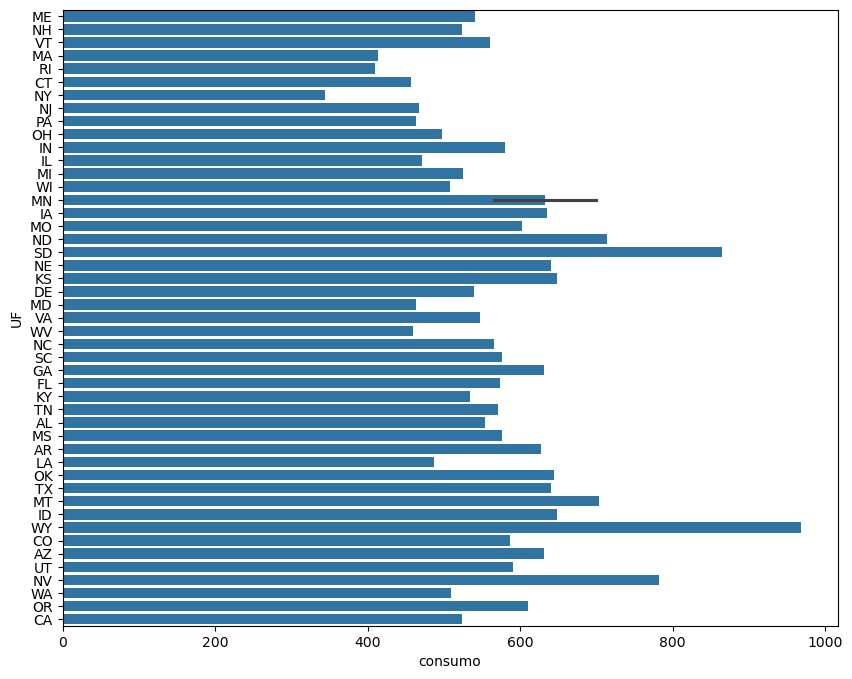

In [38]:
plt.figure(figsize=(10, 8)) 
sns.barplot(x="consumo", y="UF", data=data5) 

<Axes: xlabel='taxa', ylabel='consumo'>

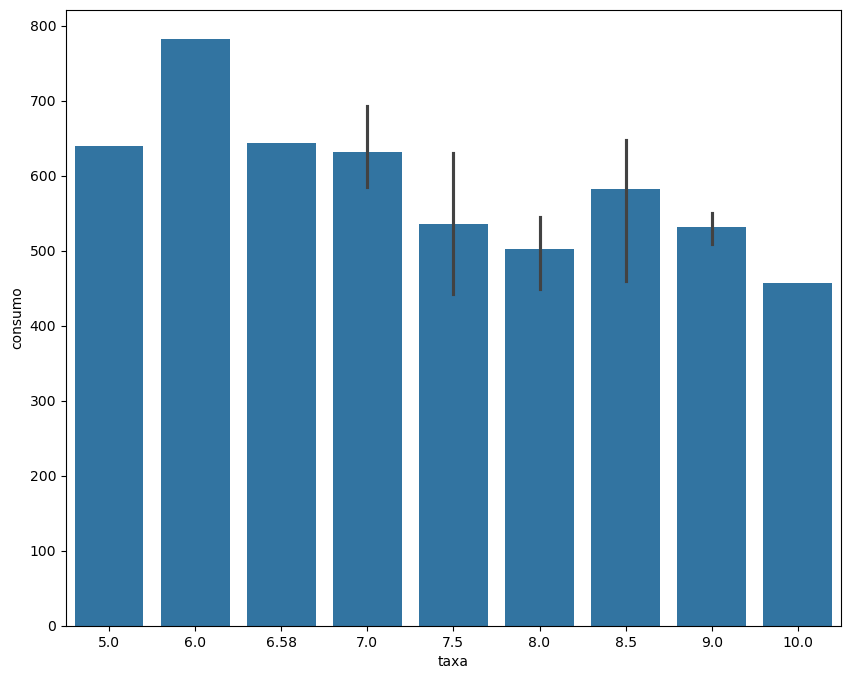

In [39]:
plt.figure(figsize=(10, 8)) 
sns.barplot(x="taxa", y="consumo", data=data5)

<Axes: xlabel='renda', ylabel='consumo'>

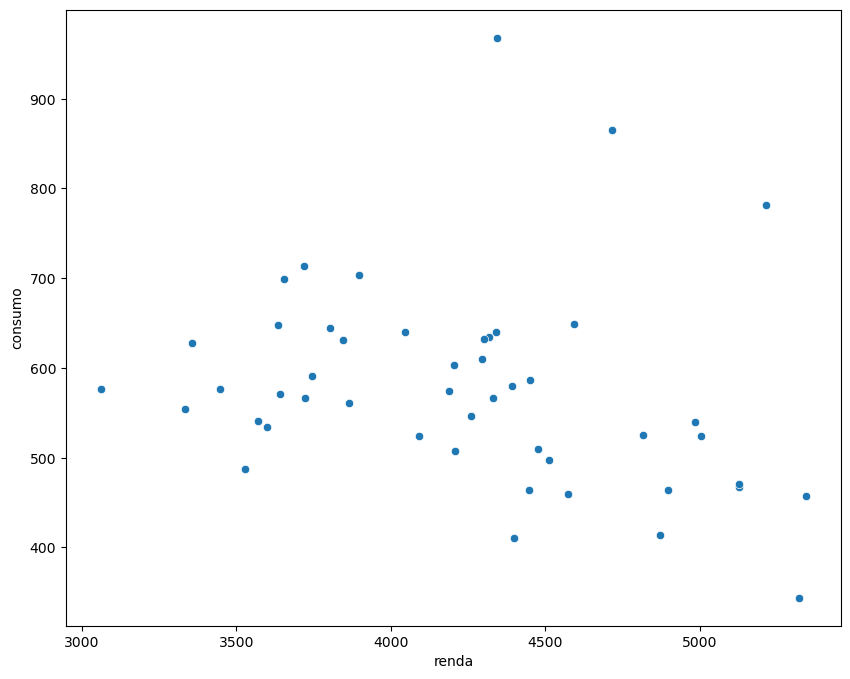

In [40]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x="renda", y="consumo", data=data5)

<Axes: xlabel='estradas', ylabel='renda'>

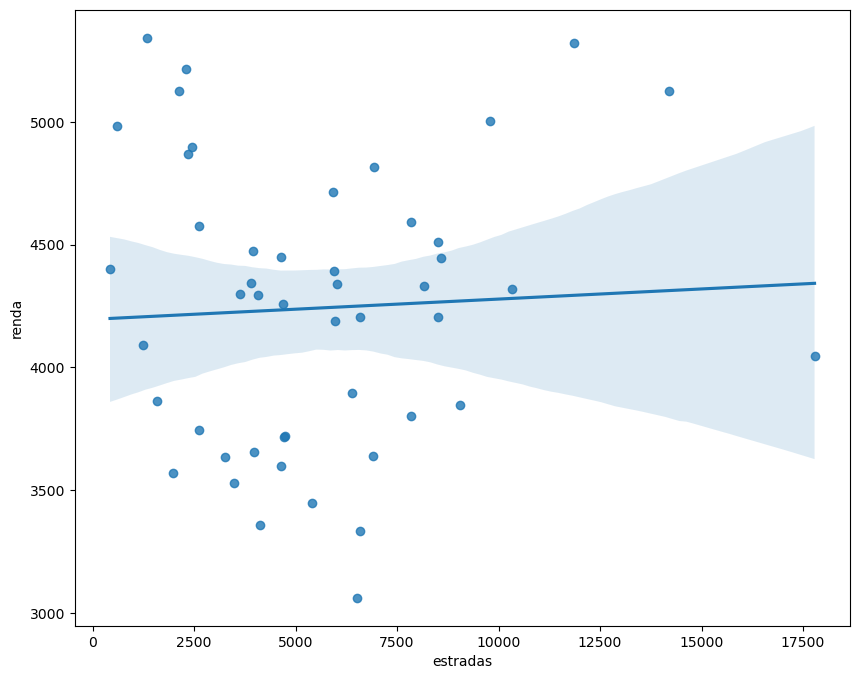

In [41]:
plt.figure(figsize=(10, 8)) 
sns.regplot(x="estradas", y="renda", data=data5)

<Axes: xlabel='consumo', ylabel='renda'>

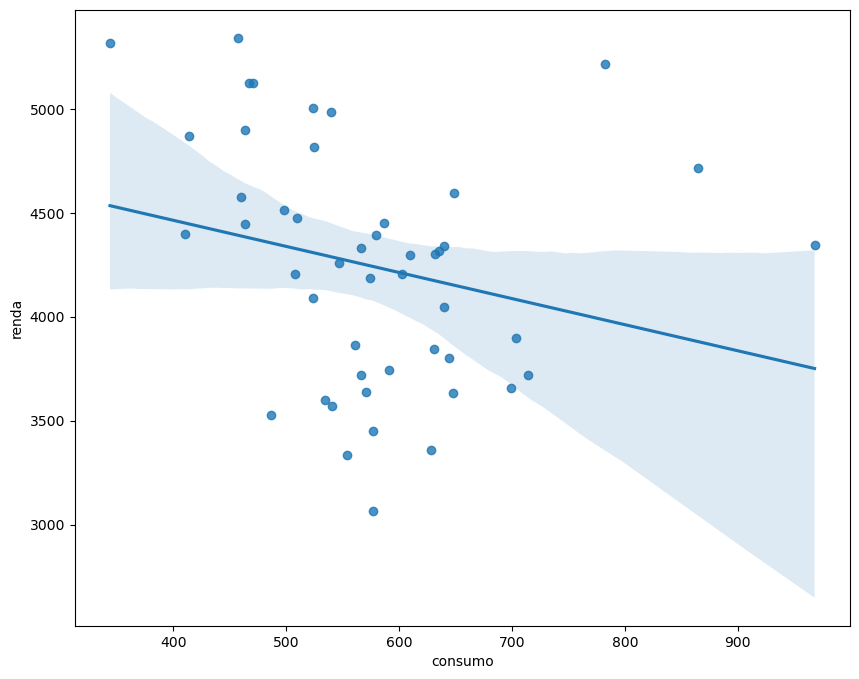

In [42]:
plt.figure(figsize=(10, 8)) 
sns.regplot(x="consumo", y="renda", data=data5)

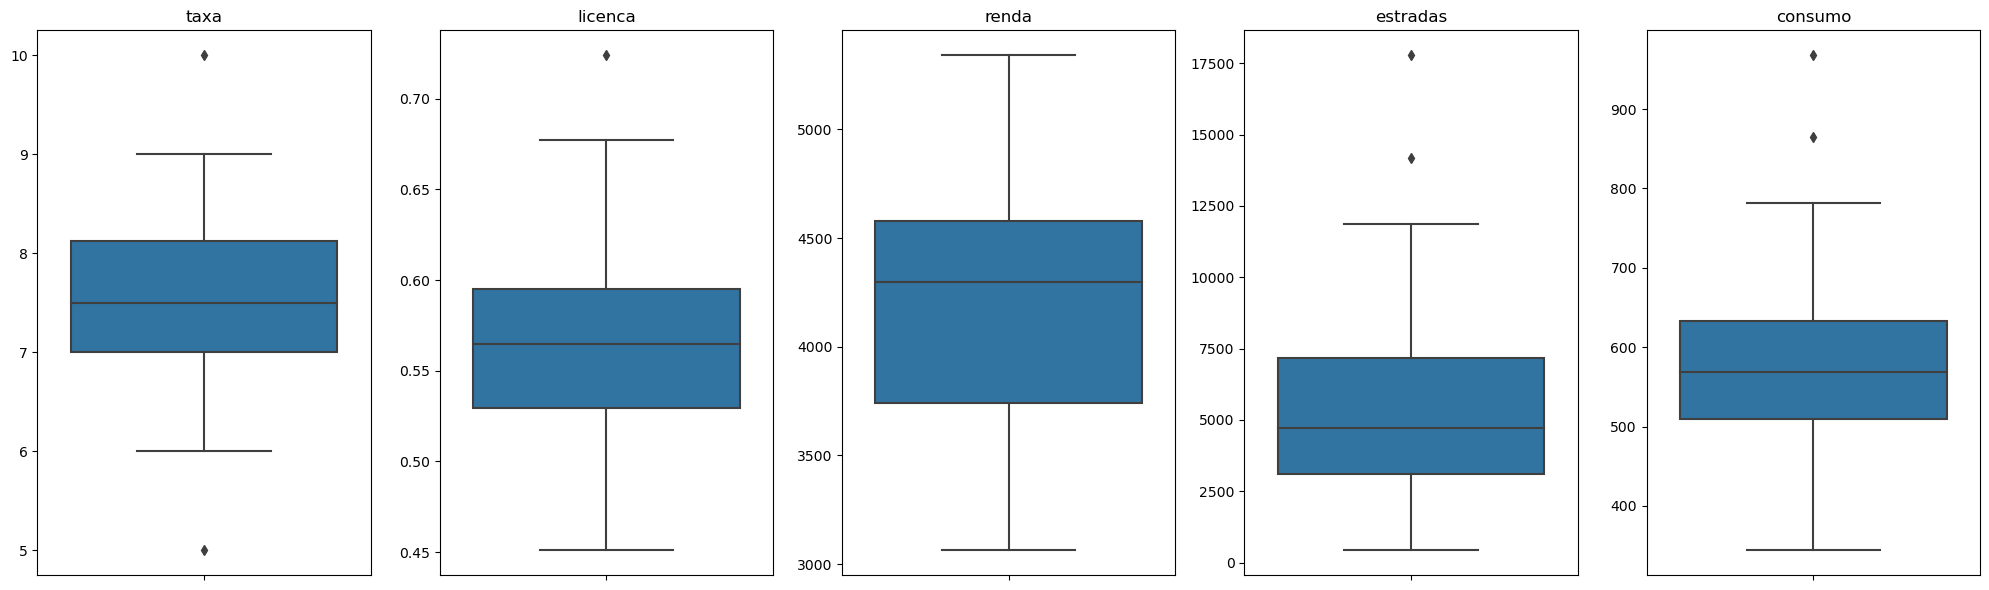

In [45]:
# Checking outlers
variaveis = ['taxa', 'licenca', 'renda', 'estradas', 'consumo']

num_vars = len(variaveis)
plt.figure(figsize=(num_vars * 4, 6))  

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, num_vars, i)
    sns.boxplot(y=data5[var])
    plt.title(var)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Division Training and Test

In [43]:
# Independent Variables
x = data5[['taxa', 'licenca', 'renda', 'estradas']]

# Target variable
y = data5['consumo']

In [44]:
# Viewing lines and columns x
x.shape

(48, 4)

In [45]:
# Viewing lines and columns y
y.shape

(48,)

# Model Training

In [46]:
# Divide together training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [47]:
# Viewing training
print("Linhas e colunas X_train", X_train.shape)
print("Linhas e colunas y_train", y_train.shape)

Linhas e colunas X_train (38, 4)
Linhas e colunas y_train (38,)


# Linear Regression Model

In [48]:
# Create the model and train
model_reg2 = LinearRegression()

# Model Training
model_reg2.fit(X_train, y_train)

LinearRegression()

In [49]:
# Score Model
model_score2 = model_reg2.score(X_train, y_train)
print("Score modelo regressão linear 2:", model_score2)

Score modelo regressão linear 2: 0.7068781342155135


In [50]:
# Display coefficients and intercept
print("Coeficientes:", model_reg2.coef_)
print("Intercepto:", model_reg2.intercept_)

Coeficientes: [-3.69937459e+01  1.34686930e+03 -5.65355145e-02 -4.38217137e-03]
Intercepto: 361.45087906051486


In [51]:
# Model forecast
y_pred2 = model_reg2.predict(X_test)

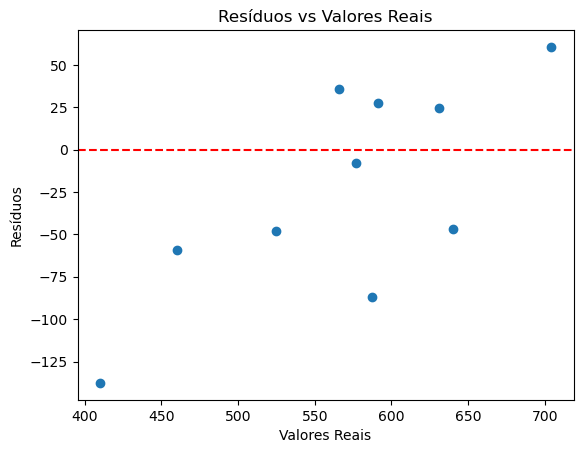

In [52]:
residuos = y_test - y_pred2

plt.scatter(y_test, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Reais')
plt.show()

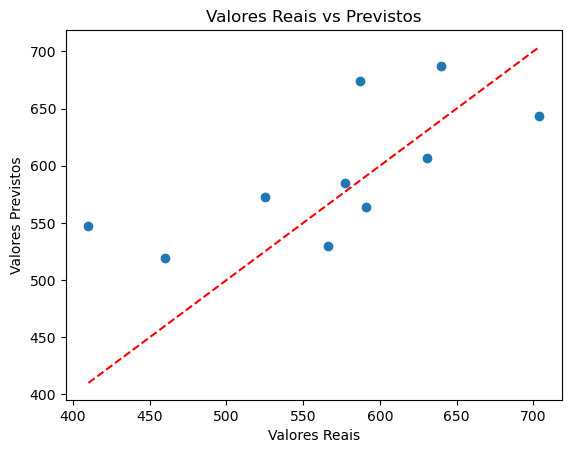

In [53]:
plt.scatter(y_test, y_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()

In [54]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 4083.2558717251245
R-squared (R²): 0.3913664001459073


** Exercise 3 **
  
The IMDB.CSV file contains the information of the movie IMBD notes. Make a model to predict the IMDB grade based on the variables
Likes_facebook, revenue, budget, duration and color.

In [55]:
base = pd.read_csv("data/imdb.csv", delimiter=';', decimal='.', na_values=[' '], encoding='ISO-8859-1')
base.head(n=10)

,titulo,ano,diretor,duracao,cor,generos,pais,classificacao,orcamento,receita,nota_imdb,likes_facebook,ator_1,ator_2,ator_3
0,Avatar,2009.0,James Cameron,178.0,Color,Action|Adventure|Fantasy|Sci-Fi,USA,A partir de 13 anos,237000000.0,760505847.0,"7,9",33000,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,169.0,Color,Action|Adventure|Fantasy,USA,A partir de 13 anos,300000000.0,309404152.0,"7,1",0,Johnny Depp,Orlando Bloom,Jack Davenport
2,The Dark Knight Rises,2012.0,Christopher Nolan,164.0,Color,Action|Thriller,USA,A partir de 13 anos,250000000.0,448130642.0,"8,5",164000,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
3,John Carter,2012.0,Andrew Stanton,132.0,Color,Action|Adventure|Sci-Fi,USA,A partir de 13 anos,263700000.0,73058679.0,"6,6",24000,Daryl Sabara,Samantha Morton,Polly Walker
4,Spider-Man 3,2007.0,Sam Raimi,156.0,Color,Action|Adventure|Romance,USA,A partir de 13 anos,258000000.0,336530303.0,"6,2",0,J.K. Simmons,James Franco,Kirsten Dunst
5,Tangled,2010.0,Nathan Greno,100.0,Color,Adventure|Animation|Comedy|Family|Fantasy|Musi...,USA,Livre,260000000.0,200807262.0,"7,8",29000,Brad Garrett,Donna Murphy,M.C. Gainey
6,Avengers: Age of Ultron,2015.0,Joss Whedon,141.0,Color,Action|Adventure|Sci-Fi,USA,A partir de 13 anos,250000000.0,458991599.0,"7,5",118000,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
7,Batman v Superman: Dawn of Justice,2016.0,Zack Snyder,183.0,Color,Action|Adventure|Sci-Fi,USA,A partir de 13 anos,250000000.0,330249062.0,"6,9",197000,Henry Cavill,Lauren Cohan,Alan D. Purwin
8,Superman Returns,2006.0,Bryan Singer,169.0,Color,Action|Adventure|Sci-Fi,USA,A partir de 13 anos,209000000.0,200069408.0,"6,1",0,Kevin Spacey,Marlon Brando,Frank Langella
9,Pirates of the Caribbean: Dead Man's Chest,2006.0,Gore Verbinski,151.0,Color,Action|Adventure|Fantasy,USA,A partir de 13 anos,225000000.0,423032628.0,"7,3",5000,Johnny Depp,Orlando Bloom,Jack Davenport


In [56]:
base.tail()

,titulo,ano,diretor,duracao,cor,generos,pais,classificacao,orcamento,receita,nota_imdb,likes_facebook,ator_1,ator_2,ator_3
3802,Newlyweds,2011.0,Edward Burns,95.0,Color,Comedy|Drama,USA,Outros,9000.0,4584.0,"6,4",413,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda
3803,The Following,NaN,NaN,43.0,Color,Crime|Drama|Mystery|Thriller,USA,Outros,NaN,NaN,"7,5",32000,Natalie Zea,Valorie Curry,Sam Underwood
3804,A Plague So Pleasant,2013.0,Benjamin Roberds,76.0,Color,Drama|Horror|Thriller,USA,Outros,1400.0,NaN,"6,3",16,Eva Boehnke,Maxwell Moody,David Chandler
3805,Shanghai Calling,2012.0,Daniel Hsia,100.0,Color,Comedy|Drama|Romance,USA,A partir de 13 anos,NaN,10443.0,"6,3",660,Alan Ruck,Daniel Henney,Eliza Coupe
3806,My Date with Drew,2004.0,Jon Gunn,90.0,Color,Documentary,USA,Livre,1100.0,85222.0,"6,6",456,John August,Brian Herzlinger,Jon Gunn


In [57]:
base.shape

(3807, 15)

In [58]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titulo          3807 non-null   object 
 1   ano             3733 non-null   float64
 2   diretor         3733 non-null   object 
 3   duracao         3801 non-null   float64
 4   cor             3793 non-null   object 
 5   generos         3807 non-null   object 
 6   pais            3807 non-null   object 
 7   classificacao   3807 non-null   object 
 8   orcamento       3509 non-null   float64
 9   receita         3235 non-null   float64
 10  nota_imdb       3807 non-null   object 
 11  likes_facebook  3807 non-null   int64  
 12  ator_1          3803 non-null   object 
 13  ator_2          3800 non-null   object 
 14  ator_3          3794 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 446.3+ KB


In [59]:
base.dtypes

titulo             object
ano               float64
diretor            object
duracao           float64
cor                object
generos            object
pais               object
classificacao      object
orcamento         float64
receita           float64
nota_imdb          object
likes_facebook      int64
ator_1             object
ator_2             object
ator_3             object
dtype: object

# Exploratory data analysis

In [60]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
ano,3733.0,2.002079e+03,1.284688e+01,1916.0,1998.0,2005.0,2011.0,2016.0
duracao,3801.0,1.064351e+02,2.372573e+01,7.0,93.0,103.0,117.0,330.0
orcamento,3509.0,3.575599e+07,4.268884e+07,218.0,6500000.0,20000000.0,50000000.0,300000000.0
receita,3235.0,5.521461e+07,7.173312e+07,703.0,10110274.0,32178777.0,72147000.0,760505847.0
likes_facebook,3807.0,7.951245e+03,2.013925e+04,0.0,0.0,195.0,5000.0,349000.0


In [61]:
base.head()

,titulo,ano,diretor,duracao,cor,generos,pais,classificacao,orcamento,receita,nota_imdb,likes_facebook,ator_1,ator_2,ator_3
0,Avatar,2009.0,James Cameron,178.0,Color,Action|Adventure|Fantasy|Sci-Fi,USA,A partir de 13 anos,237000000.0,760505847.0,"7,9",33000,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,169.0,Color,Action|Adventure|Fantasy,USA,A partir de 13 anos,300000000.0,309404152.0,"7,1",0,Johnny Depp,Orlando Bloom,Jack Davenport
2,The Dark Knight Rises,2012.0,Christopher Nolan,164.0,Color,Action|Thriller,USA,A partir de 13 anos,250000000.0,448130642.0,"8,5",164000,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
3,John Carter,2012.0,Andrew Stanton,132.0,Color,Action|Adventure|Sci-Fi,USA,A partir de 13 anos,263700000.0,73058679.0,"6,6",24000,Daryl Sabara,Samantha Morton,Polly Walker
4,Spider-Man 3,2007.0,Sam Raimi,156.0,Color,Action|Adventure|Romance,USA,A partir de 13 anos,258000000.0,336530303.0,"6,2",0,J.K. Simmons,James Franco,Kirsten Dunst


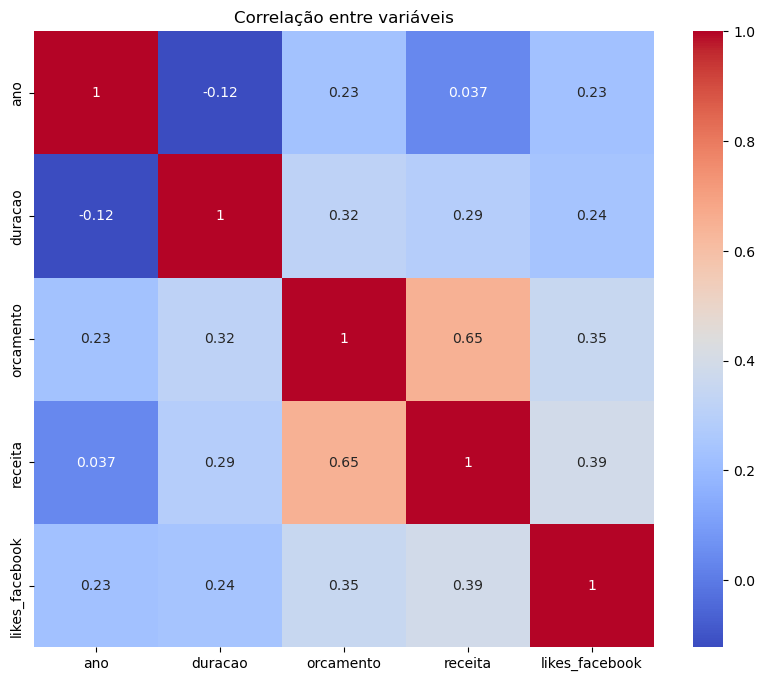

In [62]:
# Correlation between variables
correlation = base[["ano", "duracao", "orcamento","receita", 'likes_facebook']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()

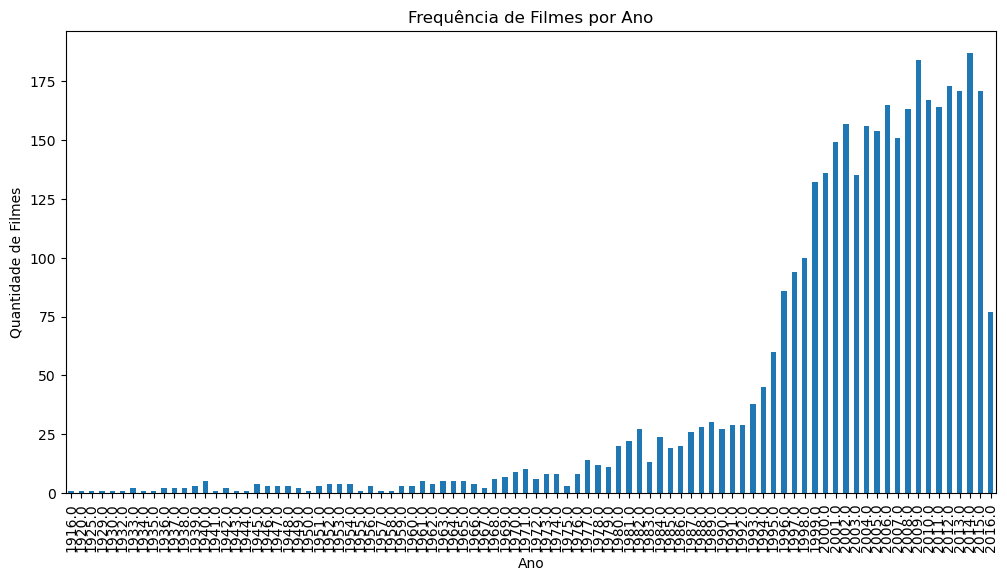

In [63]:
plt.figure(figsize=(10, 8)) 
base['ano'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Frequência de Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.show()

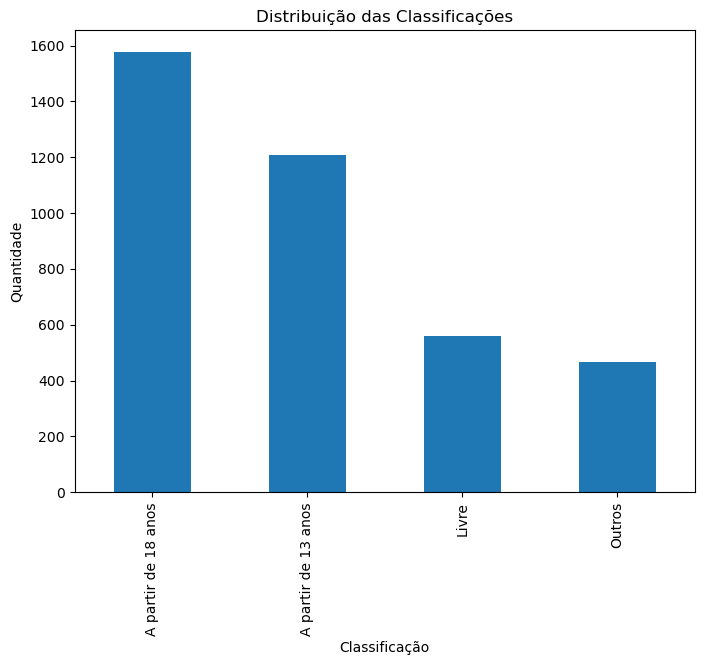

In [67]:
base['classificacao'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribuição das Classificações')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.show()

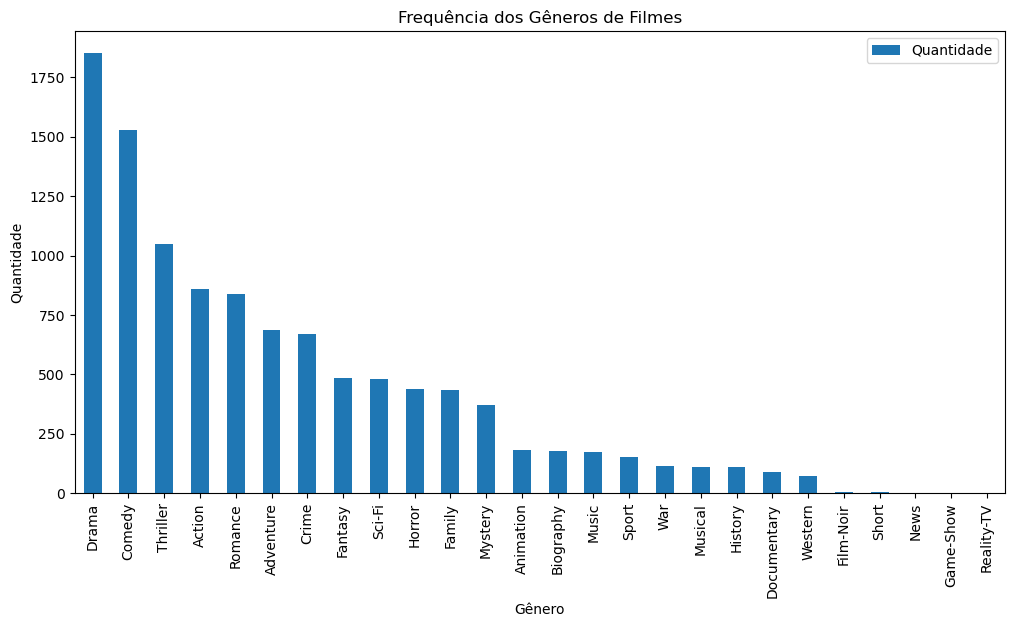

In [69]:
generos = base['generos'].dropna().str.split('|').explode()
generos_contagem = Counter(generos)

# Convert to Dataframe and Plot
generos_df = pd.DataFrame(generos_contagem.items(), columns=['Genero', 'Quantidade']).sort_values(by='Quantidade', ascending=False)

generos_df.plot(kind='bar', x='Genero', y='Quantidade', figsize=(12, 6))
plt.title('Frequência dos Gêneros de Filmes')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

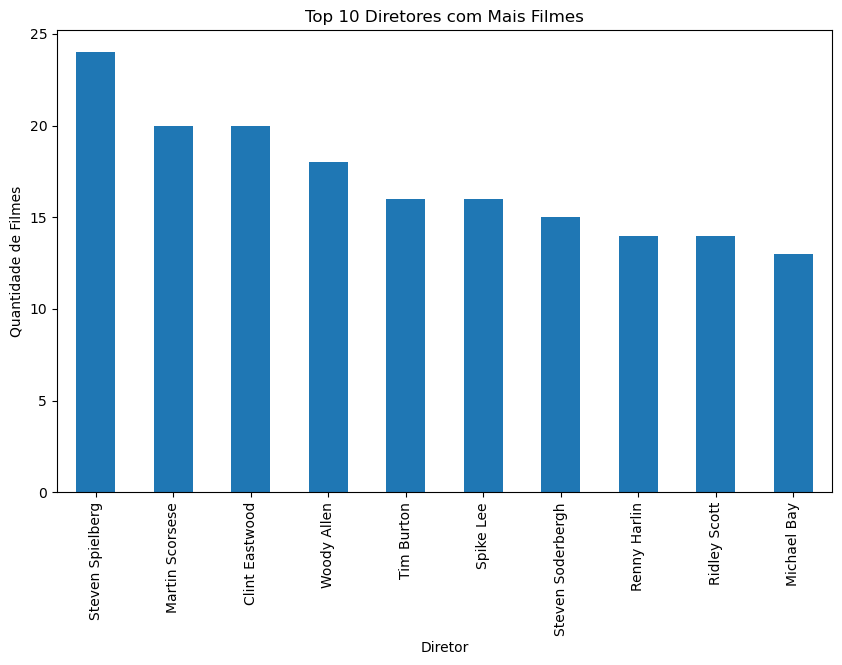

In [70]:
diretores = base['diretor'].value_counts().head(10)
diretores.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Diretores com Mais Filmes')
plt.xlabel('Diretor')
plt.ylabel('Quantidade de Filmes')
plt.show()

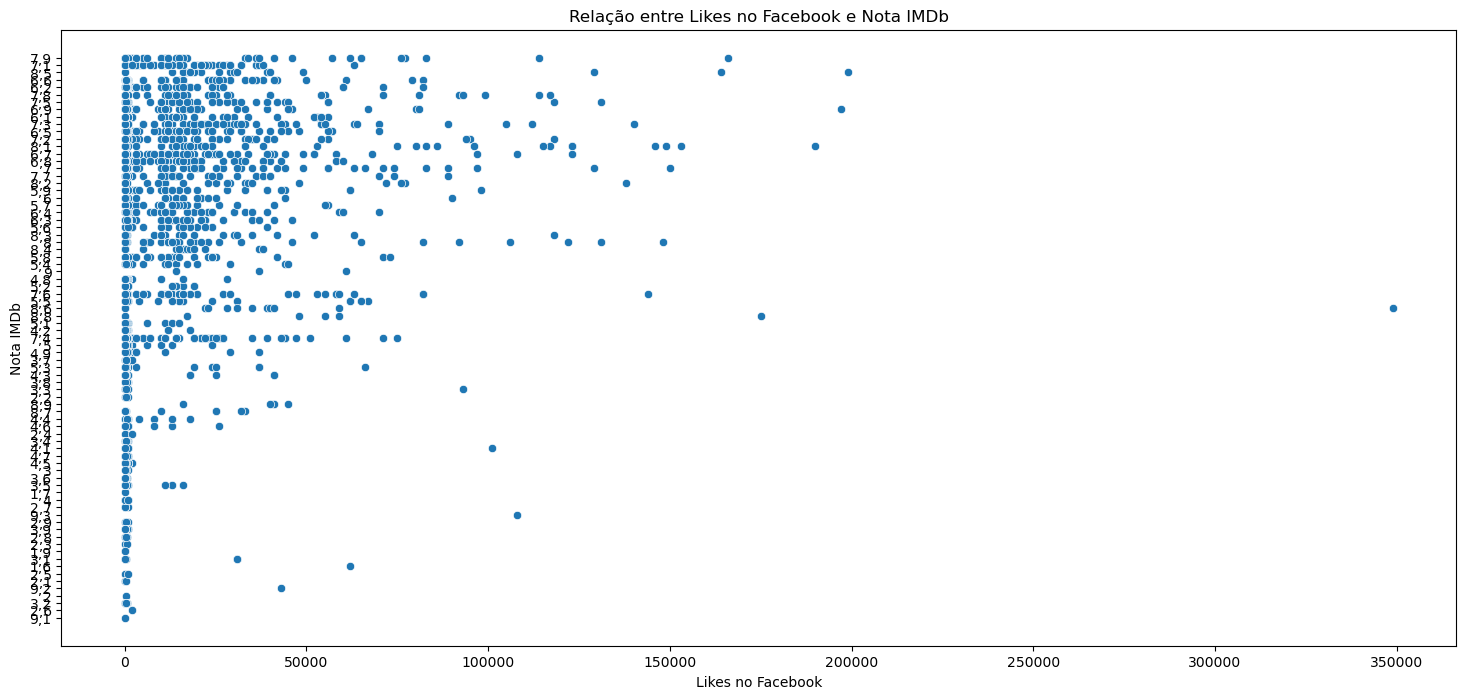

In [77]:
plt.figure(figsize=(18, 8)) 

sns.scatterplot(data=base, x='likes_facebook', y='nota_imdb')
plt.title('Relação entre Likes no Facebook e Nota IMDb')
plt.xlabel('Likes no Facebook')
plt.ylabel('Nota IMDb')
plt.show()

<Axes: xlabel='duracao', ylabel='nota_imdb'>

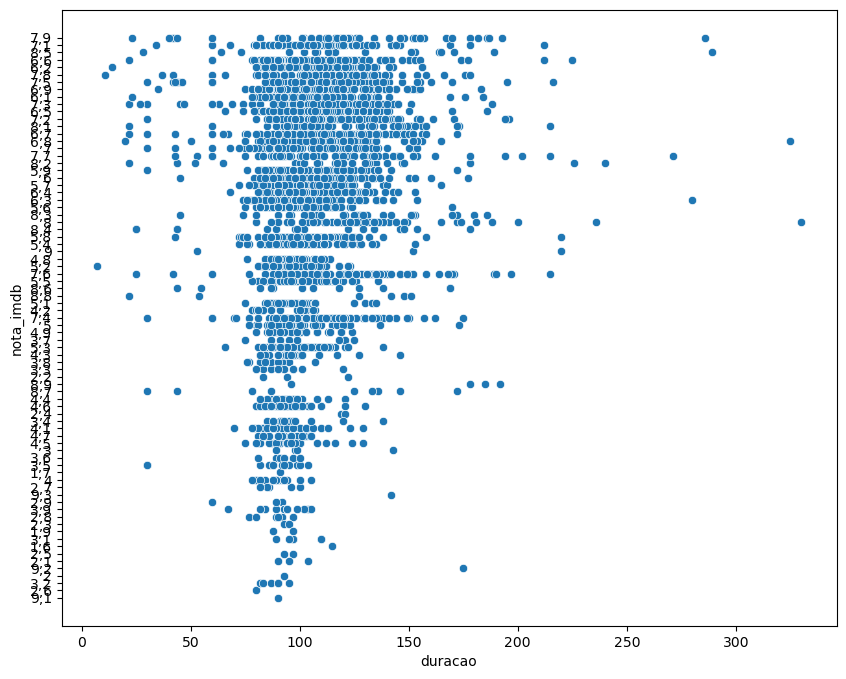

In [78]:
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x="duracao", y="nota_imdb", data=base)

,titulo,receita
0,Avatar,760505847.0
20,Titanic,658672302.0
23,Jurassic World,652177271.0
692,The Avengers,623279547.0
13,The Avengers,623279547.0
57,The Dark Knight,533316061.0
207,Star Wars: Episode I - The Phantom Menace,474544677.0
2403,Star Wars: Episode IV - A New Hope,460935665.0
6,Avengers: Age of Ultron,458991599.0
2,The Dark Knight Rises,448130642.0


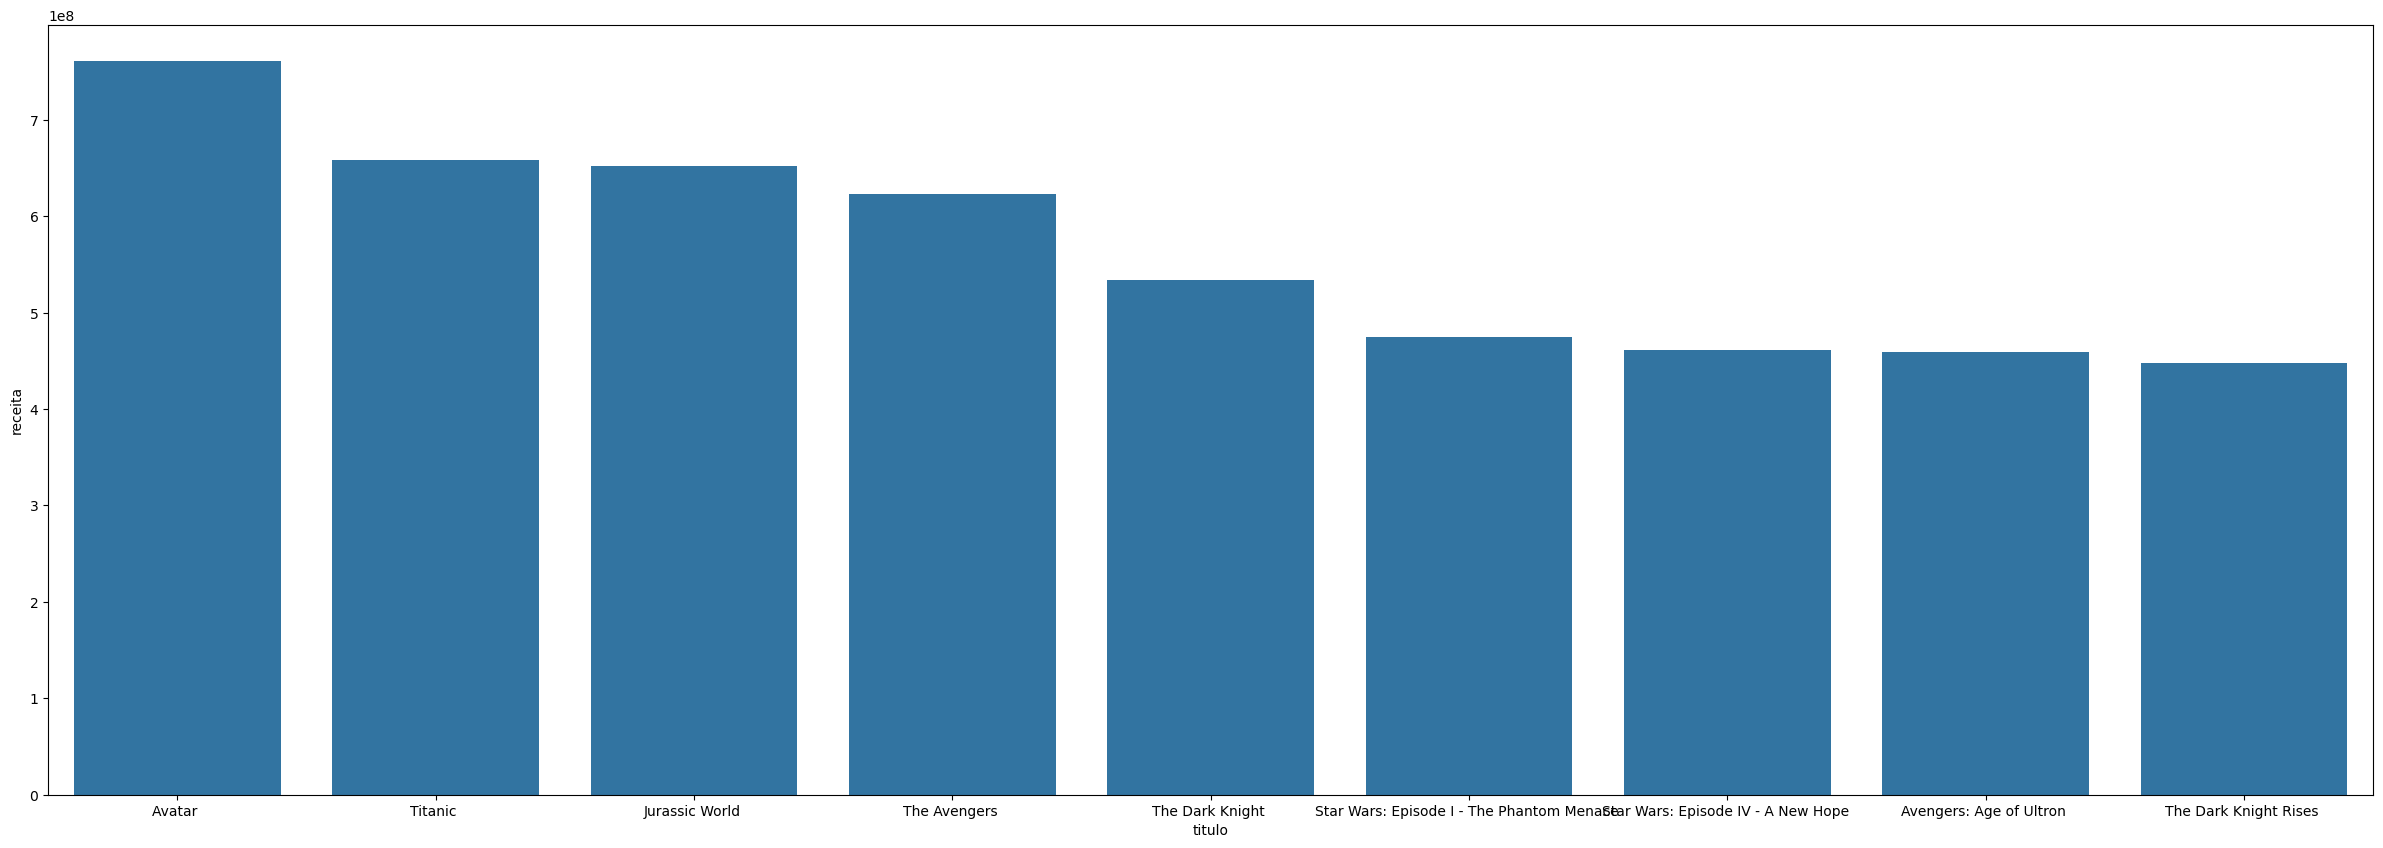

In [82]:
## advanced insights
top_receita = base.sort_values(by='receita', ascending=False).head(10)

plt.figure(figsize=(30, 10)) 
sns.barplot(x="titulo", y="receita", data=top_receita)
top_receita[['titulo', 'receita']]

In [83]:
diretores_receita = base.groupby('diretor')['receita'].mean().sort_values(ascending=False).head(10)
diretores_receita

diretor
Joss Whedon        4.327217e+08
Lee Unkrich        4.149845e+08
Chris Buck         4.007366e+08
Tim Miller         3.630243e+08
George Lucas       3.482837e+08
Kyle Balda         3.360296e+08
Colin Trevorrow    3.280925e+08
James Cameron      3.182877e+08
Pete Docter        3.131138e+08
Pierre Coffin      3.097756e+08
Name: receita, dtype: float64

# Viewing null data

In [84]:
print(base.isnull().sum())

titulo              0
ano                74
diretor            74
duracao             6
cor                14
generos             0
pais                0
classificacao       0
orcamento         298
receita           572
nota_imdb           0
likes_facebook      0
ator_1              4
ator_2              7
ator_3             13
dtype: int64


In [85]:
# Excluding null data
base = base.dropna()
print(base.isnull().sum())

titulo            0
ano               0
diretor           0
duracao           0
cor               0
generos           0
pais              0
classificacao     0
orcamento         0
receita           0
nota_imdb         0
likes_facebook    0
ator_1            0
ator_2            0
ator_3            0
dtype: int64


In [86]:
# Doing feature engineering with label Encoder for the variable categorical to nest

from sklearn.preprocessing import LabelEncoder

# Varyávels
categorical_columns = ["titulo", "diretor", "cor", 
                       "generos", "pais", "classificacao", 
                       "ator_1", "ator_2", "ator_3"]

# Creating an instance
label_encoder = LabelEncoder()

# transforming categorical rods to numeric
for column in categorical_columns:
    base[column] = label_encoder.fit_transform(base[column])

# Replace commas with points and convert to float
base['nota_imdb'] = base['nota_imdb'].str.replace(',', '.').astype(float)

# Viewing Dataset
base.head()

,titulo,ano,diretor,duracao,cor,generos,pais,classificacao,orcamento,receita,nota_imdb,likes_facebook,ator_1,ator_2,ator_3
0,232,2009.0,532,178.0,1,82,0,0,237000000.0,760505847.0,7.9,33000,155,833,2104
1,1649,2007.0,464,169.0,1,76,0,0,300000000.0,309404152.0,7.1,0,575,1329,827
2,2250,2012.0,213,164.0,1,212,0,0,250000000.0,448130642.0,8.5,164000,1111,325,1047
3,1182,2012.0,57,132.0,1,95,0,0,263700000.0,73058679.0,6.6,24000,265,1527,1641
4,1980,2007.0,1202,156.0,1,91,0,0,258000000.0,336530303.0,6.2,0,454,732,1177


# Division Training and Test

In [87]:
# Division Training and Test
x1 = base[["likes_facebook", "receita", "orcamento", "cor"]]
y1 = base["nota_imdb"]

In [88]:
# Model Training
# Division in training and testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

print("Treinamento X_train", X_train1.shape)
print("Treinamento y_train", y_train1.shape)

print()

print("Treinamento X_test", X_test1.shape)
print("Treinamento y_test", y_test1.shape)

Treinamento X_train (2454, 4)
Treinamento y_train (2454,)

Treinamento X_test (614, 4)
Treinamento y_test (614,)


# Linear Regression Model

In [89]:
# Model with linear regression with sklearn
modelo_regressao_4 = LinearRegression()
modelo_regressao_4.fit(X_train1, y_train1)

LinearRegression()

In [90]:
# Model Regression Socre
modelo_regressao_score = modelo_regressao_4.score(X_train1, y_train1)
print("Score modelo regressão linear", modelo_regressao_score)

Score modelo regressão linear 0.14201120931769395


In [91]:
# Model forecast
y_pred = modelo_regressao_4.predict(X_test1)

In [92]:
# Display coefficients
print("Coeficientes:", model.coef_)

Coeficientes: [208.72178843]


In [93]:
# Display intercept
print("Intercepto:", model.intercept_)

Intercepto: -422.78974578386294


In [94]:
# residues
residuos = y_test1 - y_pred
residuos

2949   -0.145592
1833   -0.306397
2869    0.091519
1526    0.701763
2312    0.085342
          ...   
3598   -0.289336
2455   -0.754688
221     0.568913
374    -1.688253
1973    0.633700
Name: nota_imdb, Length: 614, dtype: float64

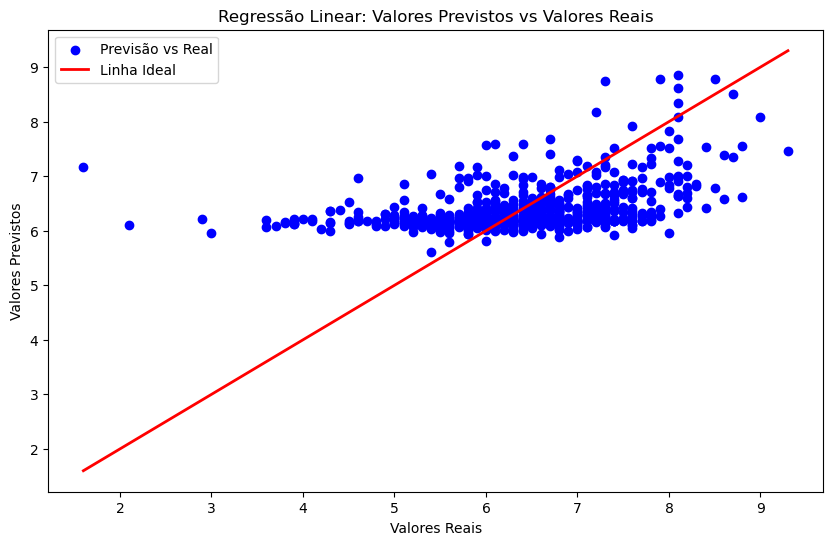

In [95]:
# Dispersion Chart
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred, color='blue', label='Previsão vs Real')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='red', lw=2, label='Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear: Valores Previstos vs Valores Reais')
plt.legend()
plt.show()

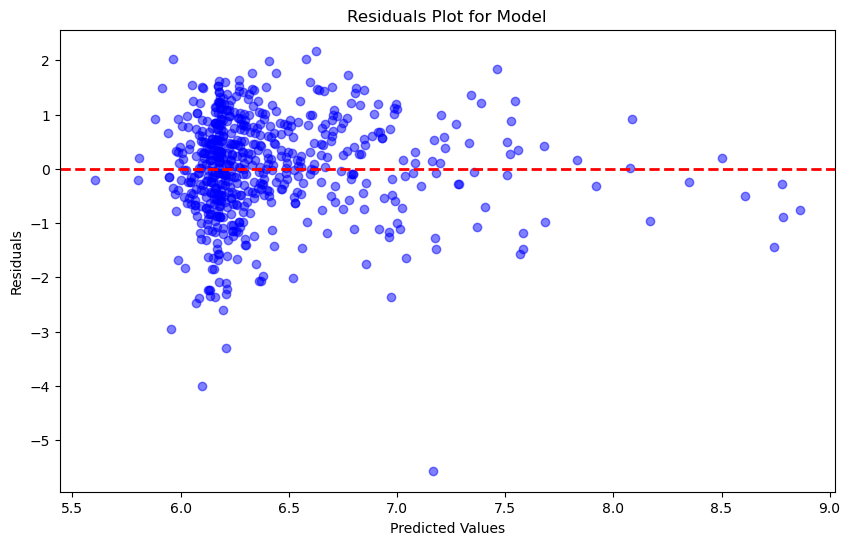

In [96]:
# Plot waste
# Plot Residuals Scatter Plot (residuals vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Metrics
mae = mean_absolute_error(y_test1, y_pred)
mse = mean_squared_error(y_test1, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1, y_pred)

# Viewing metrics
print("Métrica modelo regressão MAE:", mae)
print("Métrica modelo regressão MSE:", mse)
print("Métrica modelo regressão RMSE:", rmse)
print("Métrica modelo regressão r2:", r2)

Métrica modelo regressão MAE: 0.7234444260901536
Métrica modelo regressão MSE: 0.876194847735245
Métrica modelo regressão RMSE: 0.9360528017880428
Métrica modelo regressão r2: 0.1817525333844171
